# Support Vector Regression (SVR)

## Importing the libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [91]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[ :, 1:-1].values
y = dataset.iloc[ :, -1].values

In [92]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [93]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

## Feature Scaling

In [94]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_scaled=sc_X.fit_transform(X)
sc_y = StandardScaler()
y_scaled=sc_y.fit_transform(y.reshape(-1,1))

In [95]:
X_scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [96]:
y_scaled

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole dataset

In [134]:
from sklearn.svm import SVR
model = SVR(kernel="rbf")
model.fit(X_scaled,y_scaled.ravel())
print("model R² score is ", model.score(X_scaled, y_scaled) )

model R² score is  0.7516001070620798


## Predicting a new result

In [127]:
sc_y.inverse_transform( model.predict( sc_X.transform( [[6.5]] ) ).reshape(-1,1) )

array([[170370.0204065]])

## Visualising the SVR results

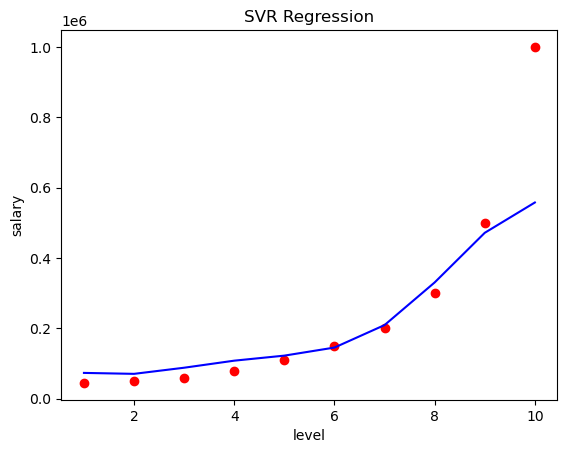

In [135]:
y_pred = sc_y.inverse_transform( model.predict(X_scaled).reshape(-1,1) )
plt.scatter( X, y, c="red")
plt.plot( X, y_pred, c="blue")
plt.title("SVR Regression")
plt.xlabel("level")
plt.ylabel("salary")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)